# Supervised Learning Linear Regression

Setting up data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#plot import
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#import from csv
nyc_sub = pd.read_csv('C:/Users/aswat/nyc_subway_weather.csv')

In [4]:
nyc_sub.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,5/1/2011,0:00:00,4388333,2911002,0.0,0.0,5/1/2011 0:00,0.0,6.0,...,30.22,0.0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,5/1/2011,4:00:00,4388333,2911002,0.0,0.0,5/1/2011 4:00,4.0,6.0,...,30.25,0.0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,5/1/2011,12:00:00,4388333,2911002,0.0,0.0,5/1/2011 12:00,12.0,6.0,...,30.28,0.0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,5/1/2011,16:00:00,4388333,2911002,0.0,0.0,5/1/2011 16:00,16.0,6.0,...,30.26,0.0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,5/1/2011,20:00:00,4388333,2911002,0.0,0.0,5/1/2011 20:00,20.0,6.0,...,30.28,0.0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [5]:
nyc_sub.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42647.000000,42647.000000,42647.000000,42647.000000,42648.000000,42648.000000,42648.000000,42648.000000,...,42648.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000,42647.000000
mean,2.812486e+07,1.986993e+07,1886.648862,1361.523859,10.046381,2.905691,0.714430,40.724648,-73.940366,0.009825,...,29.971095,0.224752,63.103735,6.927711,0.004618,29.971097,63.103968,6.927782,40.728558,-73.938698
std,3.043607e+07,2.028986e+07,2952.441710,2183.890279,6.938864,2.079250,0.451691,0.071650,0.059712,0.098632,...,0.137943,0.417424,8.455722,4.510216,0.016345,0.131159,6.939119,3.179879,0.065421,0.059581
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.500000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [6]:
df1 = nyc_sub.copy()
#drop rows with NA
df1.dropna(inplace = True)
df1.apply(lambda x: sum(x.isnull()),axis=0)

UNIT               0
DATEn              0
TIMEn              0
ENTRIESn           0
EXITSn             0
ENTRIESn_hourly    0
EXITSn_hourly      0
datetime           0
hour               0
day_week           0
weekday            0
station            0
latitude           0
longitude          0
conds              0
fog                0
precipi            0
pressurei          0
rain               0
tempi              0
wspdi              0
meanprecipi        0
meanpressurei      0
meantempi          0
meanwspdi          0
weather_lat        0
weather_lon        0
dtype: int64

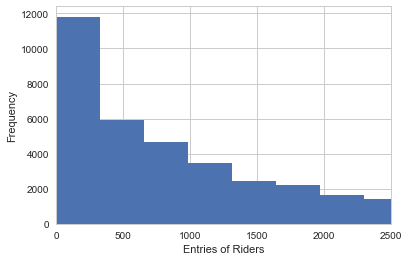

In [7]:
#Entries of Riders
plt.hist(df1['ENTRIESn_hourly'],bins=100)
plt.xlim(0,2500)
plt.xlabel('Entries of Riders')
plt.ylabel('Frequency')

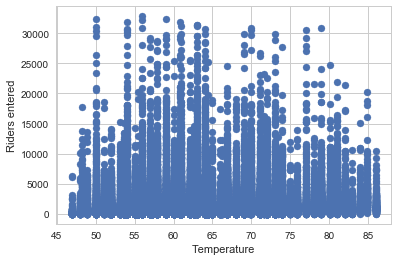

In [8]:
#Scatter plot
plt.scatter(df1['tempi'],df1['ENTRIESn_hourly'])
plt.ylabel('Riders entered')
plt.xlabel('Temperature')

We could obtain a linear fit by using a Seaborn.

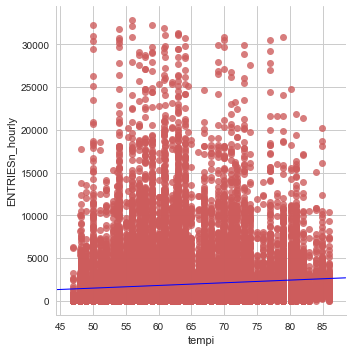

In [9]:
sns.lmplot('tempi','ENTRIESn_hourly',data=df1,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue' })

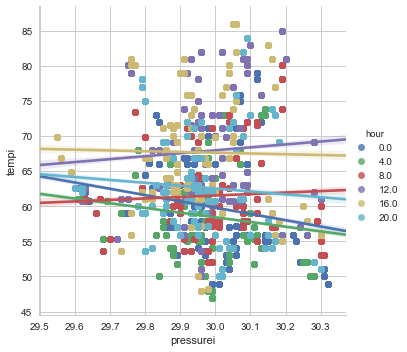

In [10]:
sns.lmplot('pressurei','tempi',df1,hue='hour')

# Univariate Linear Regression

This nothing but a regression with a single variable. We will be using NUMPY to demonstrate this:
Numpy expects a 2D array, first is different example values, and the second is attribute number

In [11]:
X = df1['tempi']
X.shape

(42647,)

In [12]:
X = np.vstack(df1['tempi'])
X.shape

(42647, 1)

In [13]:
Y = df1['ENTRIESn_hourly']

Now we have our X and Y, next we need to go ahead and use numpy to create the single variable linear regression.

                        y = mx + b
Using matrix,                        
                        
                        y =  Ap
                        A = [x 1]
                        p =[m
                            b]

In [14]:
#Create a matrix [X 1]
X = np.array( [ [value,1] for value in X] )
X

array([[array([ 55.9]), 1],
       [array([ 52.]), 1],
       [array([ 62.1]), 1],
       ..., 
       [array([ 81.]), 1],
       [array([ 77.]), 1],
       [array([ 69.1]), 1]], dtype=object)

In [15]:
# Best fit values (method linear algebra and least square method)
m , b = np.linalg.lstsq(X,Y)[0]

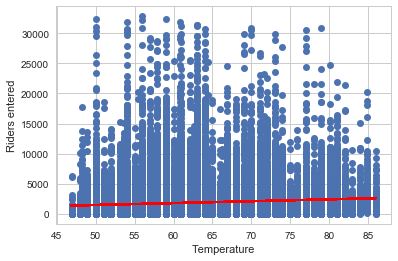

In [16]:
plt.plot(df1['tempi'],df1['ENTRIESn_hourly'],'o')

x= df1['tempi']

plt.plot(x, m*x + b,'r', label='Best fit line')
plt.ylabel('Riders entered')
plt.xlabel('Temperature')

# Finding Error in our fitted line

       We did single variable regression using the least squares method. We need to find the error. It easier to understand root mean squared error, which is similar to Standard deviation. To find out root mean square we need to divide by number of elements and then take the square root.

In [17]:
result = np.linalg.lstsq(X,Y)

error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print('The root mean square error is %.2f' %rmse)

The root mean square error is 2940.53


Since rmse corresponds to Standard deviation, we could infer that number of rider wont be twice the rmse, 95% of time

# Multivariate and Multiple Regression using Scikit learn

Suppose that a university wishes to refine its admission criteria so that they admit 'better' students. Also, suppose that a student's grade Point Average (GPA) is what the university wishes to use as a performance metric for students. They have several criteria in mind such as high school GPA (HSGPA), SAT scores (SAT), Gender etc and would like to know which one of these criteria matter as far as GPA is concerned.

Solution: Multiple Regression

In the above context, there is one dependent variable (GPA) and you have multiple independent variables (HSGPA, SAT, Gender etc). You want to find out which one of the independent variables are good predictors for your dependent variable. You would use multiple regression to make this assessment.

Instead of the above situation, suppose the admissions office wants to track student performance across time and wishes to determine which one of their criteria drives student performance across time. In other words, they have GPA scores for the four years that a student stays in school (say, GPA1, GPA2, GPA3, GPA4) and they want to know which one of the independent variables predict GPA scores better on a year-by-year basis. The admissions office hopes to find that the same independent variables predict performance across all four years so that their choice of admissions criteria ensures that student performance is consistently high across all four years.

Solution: Multivariate Regression

In example 2, we have multiple dependent variables (i.e., GPA1, GPA2, GPA3, GPA4) and multiple independent variables. In such a situation, you would use multivariate regression.

Over here, we dont have any dependent variables. Hence we are using multiple variables.

In [18]:
#import linear regression
import sklearn
from sklearn.linear_model import LinearRegression


The Linear regression class is an estimator.It predicts a value based on the observed data. All the estimators implement fit() and predict() methods. The fit method is used to learn the parameters of a model, and the predict method is used predict the value of a response variable using the learned parameters.

In [19]:
# create an object
lreg = LinearRegression()

# Linear Regression Methods: 

lreg.fit() : fits a linear model

lreg.predict() : predicts Y using the linear model with estimated coefficients

lreg.score() returns the coefficient of determination (R^2). A measure of how well the observed outcomes are replicated by the model.

In [20]:
X_multi = df1[['hour','day_week','fog','precipi','pressurei','rain','tempi','wspdi']]

Y_Target = df1.ENTRIESn_hourly



In [21]:
lreg.fit(X_multi,Y_Target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print('The estimated intercept coefficient is %.2f' %lreg.intercept_)
print('The number of coefficient used is %.2f' %len(lreg.coef_))

The estimated intercept coefficient is 11731.27
The number of coefficient used is 8.00


  The equation now is changed as,
       
                            y(w,x) = w0 + w1x1 + ... + wpxp
                            
                            where w is the coefficient and w0 is the intercept

In [23]:
#df
coeff_df = DataFrame(X_multi.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimates'] = Series(lreg.coef_)
coeff_df


,Features,Coefficient Estimates
0,hour,126.320488
1,day_week,-150.447916
2,fog,-690.828919
3,precipi,-253.720611
4,pressurei,-356.745100
5,rain,178.622292
6,tempi,3.214556
7,wspdi,-31.688185


In [62]:
#Rank
coeff_df['coef_ranked'] = coeff_df['Coefficient Estimates'].rank(ascending=0)
coeff_df

,Features,Coefficient Estimates,coef_ranked
0,hour,126.320488,2.0
1,day_week,-150.447916,5.0
2,fog,-690.828919,8.0
3,precipi,-253.720611,6.0
4,pressurei,-356.745100,7.0
5,rain,178.622292,1.0
6,tempi,3.214556,3.0
7,wspdi,-31.688185,4.0


We initially approached the problem with hour as the best correlated variable for the target arrival. But this table let us know that the rain is the best coefficient estimate when compared to that of others.

In [24]:
#removing unsignificant predictors

X_multi = X_multi[['hour','rain','tempi']]


# Multicolinearity

Multi colinearity does not exist over here. Multi colinearity occurs with categorical variables, which is present but not used. But removing them we make sure that our model does not achieve a success rate of 100 percent. A detailed concept of Multicolinearity is discussed in detail in the logistic regression. Multi colinearity is also called as dummy varaible trap.

# Using Training and Validation

We need to check on how the Entries_hour is dependent on the other variables

In [25]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X,df1['ENTRIESn_hourly'])

In [26]:
# size of the training
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(31985, 2) (10662, 2) (31985,) (10662,)


In [27]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#prediction
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [29]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : %.2f"
     % np.mean((Y_train-pred_train)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : 8710037.98


In [30]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: %.2f"
     % np.mean((Y_test-pred_test)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: 8457129.05


# Residual Plot

In regression analysis, the difference between the observed value of the dependent variable(y) and the predicted value(y^) is called as the residual(e).

                          Residual = Observed value - Predicted value

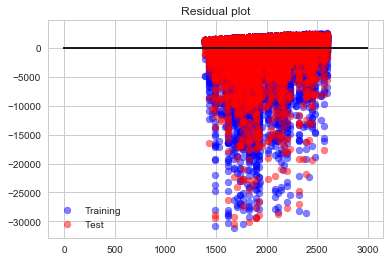

In [31]:
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

plt.hlines(y=0, xmin=-10,xmax=3000)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual plot')

In [32]:
#Compare our testing RMSE with null RMSE

y_null = np.zeros_like(Y_test, dtype=float)
y_null.fill(Y_test.mean())
y_null[0:33]

array([ 1862.96736072,  1862.96736072,  1862.96736072,  1862.96736072,
        1862.96736072,  1862.96736072,  1862.96736072,  1862.96736072,
        1862.96736072,  1862.96736072,  1862.96736072,  1862.96736072,
        1862.96736072,  1862.96736072,  1862.96736072,  1862.96736072,
        1862.96736072,  1862.96736072,  1862.96736072,  1862.96736072,
        1862.96736072,  1862.96736072,  1862.96736072,  1862.96736072,
        1862.96736072,  1862.96736072,  1862.96736072,  1862.96736072,
        1862.96736072,  1862.96736072,  1862.96736072,  1862.96736072,
        1862.96736072])

In [34]:
from sklearn import metrics
y_null_rmse =np.sqrt(metrics.mean_squared_error(Y_test, y_null))
y_null_rmse

2920.9018439091992

# Regularization

Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero.
It reduces model variance which minimizes overfitting.
For a regularized linear regression model, we minimize the sum of RSS and a "penalty term" that penalizes coefficient size.
Ridge regression (or "L2 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$
Lasso regression (or "L1 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$
$p$ is the number of features
$\beta_j$ is a model coefficient
$\alpha$ is a tuning parameter:
A tiny $\alpha$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.
Increasing the $\alpha$ penalizes the coefficients and thus shrinks them.

In [46]:
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

In [40]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

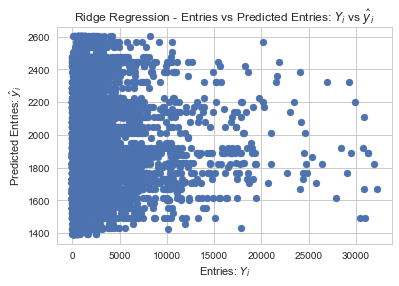

In [43]:
y_pred = ridge.predict(X_test)

plt.scatter(Y_test, y_pred)
plt.xlabel("Entries: $Y_i$")
plt.ylabel("Predicted Entries: $\hat{y}_i$")
plt.title("Ridge Regression - Entries vs Predicted Entries: $Y_i$ vs $\hat{y}_i$")

In [44]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
rmse

2908.1143463338099

In [56]:
lasso = Lasso(fit_intercept=True, alpha=0.5)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

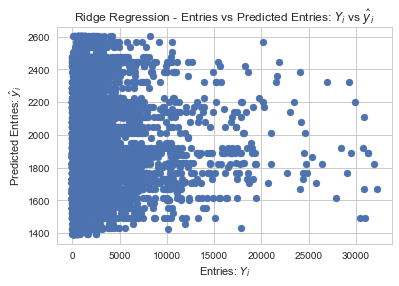

In [57]:
y_pred = lasso.predict(X_test)

plt.scatter(Y_test, y_pred)
plt.xlabel("Entries: $Y_i$")
plt.ylabel("Predicted Entries: $\hat{y}_i$")
plt.title("Ridge Regression - Entries vs Predicted Entries: $Y_i$ vs $\hat{y}_i$")

In [58]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
rmse

2908.1146366708963

In [63]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X_multi,df1['ENTRIESn_hourly'])
# size of the training
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(31985, 3) (10662, 3) (31985,) (10662,)


In [64]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
#prediction
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [66]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : %.2f"
     % np.mean((Y_train-pred_train)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : 7735131.42


In [67]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: %.2f"
     % np.mean((Y_test-pred_test)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: 8759683.78


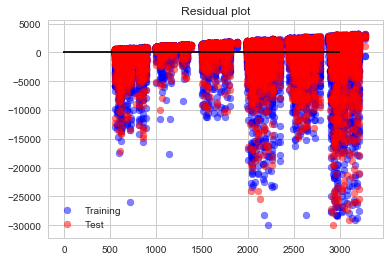

In [68]:
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

plt.hlines(y=0, xmin=-10,xmax=3000)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual plot')